In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [11]:
aerial=pd.read_csv('operations.csv')
weather_station_location=pd.read_csv('datasets_3759_5944_Weather Station Locations.csv')
weather=pd.read_csv('Summary of Weather.csv')

In [12]:
aerial.shape,weather_station_location.shape,weather.shape

((178281, 46), (161, 8), (119040, 31))

In [19]:
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


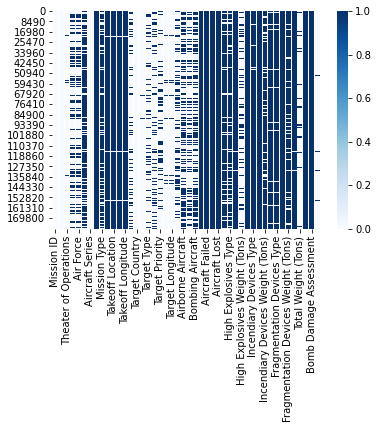

In [20]:
sns.heatmap(aerial.isnull(),cmap='Blues')

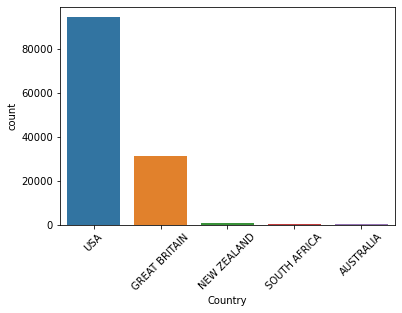

In [18]:
sns.countplot(aerial['Country'])
pl.xticks(rotation=45)
pl.show()

In [21]:
aerial=aerial[pd.isna(aerial.Country)==False]

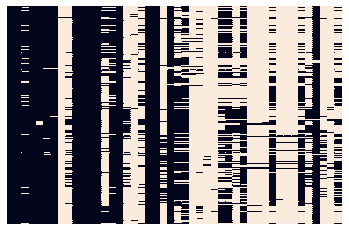

In [35]:
sns.heatmap(aerial.isnull(),xticklabels=0,yticklabels=0,cbar=False)

In [34]:
aerial=aerial[pd.isna(aerial['Target Longitude'])==False]
aerial=aerial[pd.isna(aerial['Takeoff Longitude'])==False]